Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(50000, 21)
(50000, 1)


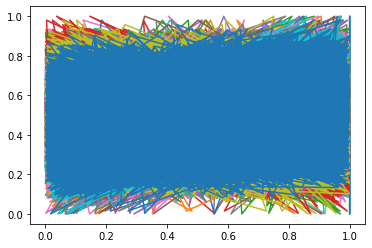

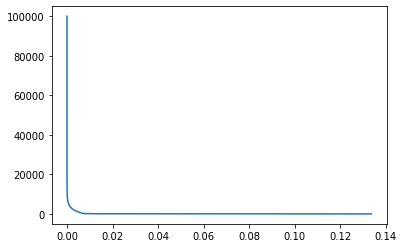

[[ 0.13107983]
 [ 0.03684599]
 [ 0.0054777 ]
 [-0.0728905 ]
 [ 0.02180152]
 [ 0.10005281]
 [ 0.00821251]
 [ 0.05138845]
 [-0.08192329]
 [ 0.00331891]
 [ 0.06519869]
 [ 0.08417738]
 [ 0.008161  ]
 [-0.2456993 ]
 [ 0.09193083]
 [ 0.12763024]
 [ 0.13786302]
 [ 0.06491566]
 [-0.00265147]
 [ 0.26847991]
 [ 0.06787186]]
(10000, 21)
(10000, 1)


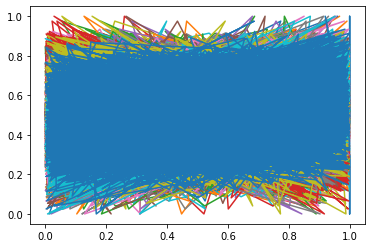

97.84184245430879


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount ('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/WOC 4.0/Linear_train.csv')
train.head()

normalized_dataset = (train - np.min(train)) / (np.max(train) - np.min(train))
X = normalized_dataset.iloc[:,1:21]
Y = normalized_dataset.iloc[:,21]

X_train=X.to_numpy()
Y_train=Y.to_numpy()

m=Y_train.shape[0]
X_train=np.c_[np.ones(m),X_train]
Y_train= Y_train.reshape(X_train.shape[0],1)

print(X_train.shape)
print(Y_train.shape)

plt.plot(X_train,Y_train)
plt.show()

def model(X_train,Y_train,learning_rate,iteration):
  m = Y_train.size
  theta=np.zeros((21,1))
  cost_list = []
  for i in range(iteration):

    y_pred= np.dot(X_train,theta)
    cost= (1/(2*m))*np.sum(np.square(y_pred-Y_train))

    d_theta = (1/m)*np.dot(X_train.T,y_pred-Y_train)
    theta = theta - learning_rate*d_theta

    cost_list.append(cost)
  


  return theta,cost_list


iteration = 100000
learning_rate=0.003
theta,cost_list=model(X_train,Y_train,learning_rate=learning_rate,iteration=iteration)

rng=np.arange(0, iteration)
plt.plot(cost_list, rng)
plt.show()

print(theta)
theta.shape

test=pd.read_csv('/content/drive/MyDrive/WOC 4.0 (1)/Linear_test.csv')
test.head()

normalized_dataset = (test - np.min(test)) / (np.max(test) - np.min(test))

X= normalized_dataset.iloc[:,1:21]
Y= normalized_dataset.iloc[:,21]

X_test=X.to_numpy()
Y_test=Y.to_numpy()

m=Y_test.shape[0]
X_test=np.c_[np.ones(m),X_test]
Y_test= Y_test.reshape(X_test.shape[0],1)

print(X_test.shape)
print(Y_test.shape)

plt.plot(X_test,Y_test)
plt.show()


y_predict= np.dot(X_test,theta)
y_predict.shape


mean_y_predict=np.mean(y_predict)*np.ones(1)
mean_Y_test=np.mean(Y_test)*np.ones(1)
accuracy=np.sum(np.square(y_predict - mean_y_predict)) / np.sum(np.square(Y_test-mean_Y_test))*100
print(accuracy)



























In [3]:
from sklearn.metrics import r2_score
r2=r2_score(y_predict,Y_test)
print(r2)

0.9966669618392026
